<a href="https://colab.research.google.com/github/AImetricsIO/udemy_advances_ta_ml/blob/main/Hybrid_Indicator_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

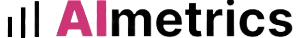
-------------------------------------------------------------------------------

---

**(C) [AImetrics.IO](https://aimetrics.io/) as a brand of Noesis AF · 2024** Please contact us at aimetricsio at gmail.com

---

📘 This notebook is explained in this course at Udemy:
Technical Analysis Advances with Machine Learning 📘

🔗 [Enroll Now](https://www.udemy.com/course/technical-analysis-advances-with-machine-learning/?referralCode=54704DE95A4891419042)

---
This notebook does not offer any buy or sell signals; it only tests models for educational purposes.

# **Python starts as an empty engine, it requires libraries, and we will only import the ones we need for this notebook's tasks. Three types of libraries:**

1.   External default libraries (they don't expire)
2.   AImetrics' libraries (until session expires)
3.   External non default (until session expires)
4.   Besides, we will use price data files in our public GitHub Repo
https://github.com/AImetricsIO/udemy_advances_ta_ml

---

To ensure that the code remains readable and efficient, we load the functions from our library`edabasic.py` and `udemy.py` located in our GitHub repository. You can view the functions at these URLs:
* [https://raw.githubusercontent.com/AImetricsIO/eda/main/edabasic.py](https://raw.githubusercontent.com/AImetricsIO/eda/main/edabasic.py)
* [https://raw.githubusercontent.com/AImetricsIO/udemy_advances_ta_ml/main/udemy.py](https://raw.githubusercontent.com/AImetricsIO/udemy_advances_ta_ml/main/udemy.py).

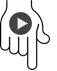



In [1]:
# <<-- PRESS PLAY TO RUN SECTION 1

# 1. Default libraries already installed in Google Colab
import os, subprocess, sys
import pandas as pd # handle tabular data (to understand it, it's like the pythons excel)
import ipywidgets as widgets # Visualization
from IPython.display import clear_output, display # Visualization

# 2. AImetrics libraries: We import the urls with the functions
!curl -O https://raw.githubusercontent.com/AImetricsIO/eda/main/edabasic.py
!curl -O https://raw.githubusercontent.com/AImetricsIO/udemy_advances_ta_ml/main/udemy.py

import edabasic
import udemy
print(f"Successfully installed edabasic and udemy")

# 3. External Libraries that we need but they are not by default in Google Colab
udemy.install_and_import('pandas_ta')
import pandas_ta as ta

# 4. We need to install or update the repository in Google Colab environment to access all the files from AImetrics github
udemy.cloning_repo()


Repository cloned successfully in Google Colab environment to /content/udemy_advances_ta_ml


# **Select one of the S&P 500 companies in the selector below the code**

---

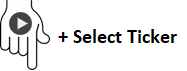


In [2]:
# <<-- PRESS PLAY TO RUN SECTION 2

# Components file in aimetrics' github
# csv_path = '/content/udemy_advances_ta_ml/SP500/'
# SPcomponents_path = csv_path + 'SPcomponents_list.csv'

csv_path = '/content/udemy_advances_ta_ml/N100/'
SPcomponents_path = csv_path + 'N100components_list.csv'

# Global variables
code = 'NVDA.US'
name = 'NVIDIA Corporation'
df_SPcomponents = None

# Load csv and transform to DataFrame
df_SPcomponents = pd.read_csv(SPcomponents_path)

# Sort by code
df_SPcomponents = df_SPcomponents.sort_values(by='code')

# Function to update global code and name
def update_globals(ticker):
    global code, name
    code, name = udemy.display_selected_ticker(ticker, df_SPcomponents)

# dropdown widget with the companies
ticker_selector = widgets.Dropdown(options=df_SPcomponents['code'], value='NVDA.US', description='Select Ticker:', disabled=False)

# Connect the widget to the update function
ticker_selector.observe(lambda change: update_globals(change['new']), names='value')

# Display the widget
display(ticker_selector)

Dropdown(description='Select Ticker:', index=70, options=('AAPL.US', 'ABNB.US', 'ADBE.US', 'ADI.US', 'ADP.US',…

# **Let's recover the data (not updated!) from this company**

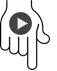

In [3]:
# <<-- PRESS PLAY TO RUN SECTION 3

# Read the data
print(f"Loading {code} {name}")
asset_file = f"{csv_path}daily/{code}.csv"
df = pd.read_csv(asset_file)

# Sort data
df = df.sort_values(by='timestamp')

# Delete unnecesary columns
df.drop(columns=['timestamp', 'gmtoffset'], inplace=True)

# Round columns 'Open', 'High', 'Low' y 'Close' to 3 decs (more may have arisen due to price adjustment 'adjusted_close')
df[['open', 'high', 'low', 'close']] = df[['open', 'high', 'low', 'close']].round(3)

df.tail(3)

Loading NVDA.US NVIDIA Corporation


,datetime,open,high,low,close,volume
751,2024-07-08,127.49,130.77,127.04,128.20,237677297.0
752,2024-07-09,130.35,133.82,128.65,131.38,287020812.0
753,2024-07-10,134.03,135.10,132.42,134.91,248978569.0


# **FEATURE ENGINEERING**

*   RSI with ta library
*   SMA directly calculated
*   You can add any others, ask your instructor at the course.
---

There's a document in the course explaining why we must transform price based indicators into absolute ones. In this case, SMA must be transformed to percentual distance.

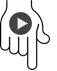



In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 4

# FEATURE ENGINEERING
df['RSI7'] = (ta.momentum.rsi(close=df['close'], window=7)).round(2)
df['RSI14'] = (ta.momentum.rsi(close=df['close'], window=14)).round(2)
df['RSI21'] = (ta.momentum.rsi(close=df['close'], window=21)).round(2)

SMA7  = df["close"].rolling(window=7, min_periods=7).mean()
SMA14 = df["close"].rolling(window=14, min_periods=14).mean()
SMA21 = df["close"].rolling(window=21, min_periods=21).mean()
SMA50 = df["close"].rolling(window=50, min_periods=50).mean()
df["SMAprc_7"] = (((df["close"] - SMA7) / SMA7) * 100).round(2)
df["SMAprc_14"] = (((df["close"] - SMA14) / SMA14) * 100).round(2)
df["SMAprc_21"] = (((df["close"] - SMA21) / SMA21) * 100).round(2)
df["SMAprc_50"] = (((df["close"] - SMA50) / SMA50) * 100).round(2)

# Delete NaN rows (nans arises due to non existent data in SMA before a period is full)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail(3)

,datetime,open,high,low,close,volume,RSI7,RSI14,RSI21,SMAprc_7,SMAprc_14,SMAprc_21,SMAprc_50
702,2024-07-08,232.18,233.75,231.67,233.34,1729502.0,57.88,57.88,57.88,1.92,1.53,0.72,5.20
703,2024-07-09,233.76,234.26,230.91,232.01,1315573.0,55.62,55.62,55.62,1.00,0.96,0.26,4.27
704,2024-07-10,234.46,239.09,233.10,238.33,4037562.0,63.01,63.01,63.01,3.11,3.62,2.91,6.75


# **UNSUPERVISED LEARNING - DIMENSIONALITY REDUCTION WITH A Principal Component Analysis (PCA)**

---

*   Select the features for hybridization.
*   Normalize the data.
*   Apply PCA using sklearn library.
*   Get the explained_variance

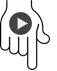

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 5

# sklearn widely used library in machine learning (no need to install, it's by default in Google Colab)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select columns for PCA
indicators_to_hybridize = ['SMAprc_7', 'SMAprc_14', 'SMAprc_21', 'SMAprc_50']
x = df[indicators_to_hybridize]

# Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA()
pca.fit(x_scaled)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative variance for 1, 2, 3, and 4 components
cumulative_variance = explained_variance.cumsum()

# Print the results
for i in range(len(cumulative_variance)):
    print(f"If we hybrid into {i+1} component(s), the remaining variance is: {cumulative_variance[i]*100:.2f}%")

If we hybrid into 1 component(s), the remaining variance is: 82.84%
If we hybrid into 2 component(s), the remaining variance is: 95.99%
If we hybrid into 3 component(s), the remaining variance is: 99.51%
If we hybrid into 4 component(s), the remaining variance is: 100.00%


# **A PCA, NOW WITH A SINGLE INDICATOR**

---

Just the same, but selecting one component `pca = PCA(n_components=1)`

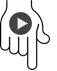

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 6

# Selecting moving average columns
indicators_to_hybridize = ['SMAprc_7', 'SMAprc_14', 'SMAprc_21', 'SMAprc_50']
x = df[indicators_to_hybridize]

# Data normalization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 1 component PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(x_scaled)

# If we want to maintain interpretability, we need to invert the PCA transformation to retrieve values in the original scale
inverse_transformed = pca.inverse_transform(principal_component)

# De-normalizing the data to obtain values comparable to the original moving averages
SMAprc_hybrid = scaler.inverse_transform(inverse_transformed)[:, 0]

# Adding the hybrid column to the DataFrame
df['SMAprc_hybrid'] = SMAprc_hybrid
df.tail(3)



,datetime,open,high,low,close,volume,RSI7,RSI14,RSI21,SMAprc_7,SMAprc_14,SMAprc_21,SMAprc_50,SMAprc_hybrid
702,2024-07-08,232.18,233.75,231.67,233.34,1729502.0,57.88,57.88,57.88,1.92,1.53,0.72,5.20,1.123535
703,2024-07-09,233.76,234.26,230.91,232.01,1315573.0,55.62,55.62,55.62,1.00,0.96,0.26,4.27,0.667307
704,2024-07-10,234.46,239.09,233.10,238.33,4037562.0,63.01,63.01,63.01,3.11,3.62,2.91,6.75,2.218290


# **SMA back to original form**

---

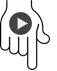


In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 7

# To ensure we start here and can repeat this cell
dfn = df.copy()

# Trnasform SMAhybrid to price
dfn['SMA7'] = dfn['close'] * (1 - dfn['SMAprc_7'] * 0.01)
dfn['SMA14'] = dfn['close'] * (1 - dfn['SMAprc_14'] * 0.01)
dfn['SMA21'] = dfn['close'] * (1 - dfn['SMAprc_21'] * 0.01)
dfn['SMA50'] = dfn['close'] * (1 - dfn['SMAprc_50'] * 0.01)
dfn['SMAhybrid'] = dfn['close'] * (1 - dfn['SMAprc_hybrid'] * 0.01)

# Delete unnecesary columns
dfn.drop(columns=['SMAprc_7', 'SMAprc_14','SMAprc_21','SMAprc_50','SMAprc_hybrid'], inplace=True)

# Round columns 'Open', 'High', 'Low' y 'Close' to 3 decs (more may have arisen due to price adjustment 'adjusted_close')
dfn[['SMA7', 'SMA14', 'SMA21', 'SMA50','SMAhybrid']] = dfn[['SMA7', 'SMA14', 'SMA21', 'SMA50','SMAhybrid']].round(3)

dfn.tail(3)

,datetime,open,high,low,close,volume,RSI7,RSI14,RSI21,SMA7,SMA14,SMA21,SMA50,SMAhybrid
702,2024-07-08,232.18,233.75,231.67,233.34,1729502.0,57.88,57.88,57.88,228.860,229.770,231.660,221.206,230.718
703,2024-07-09,233.76,234.26,230.91,232.01,1315573.0,55.62,55.62,55.62,229.690,229.783,231.407,222.103,230.462
704,2024-07-10,234.46,239.09,233.10,238.33,4037562.0,63.01,63.01,63.01,230.918,229.702,231.395,222.243,233.043


# **PLOT the SMA**

---

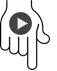

mplfinance is already installed.


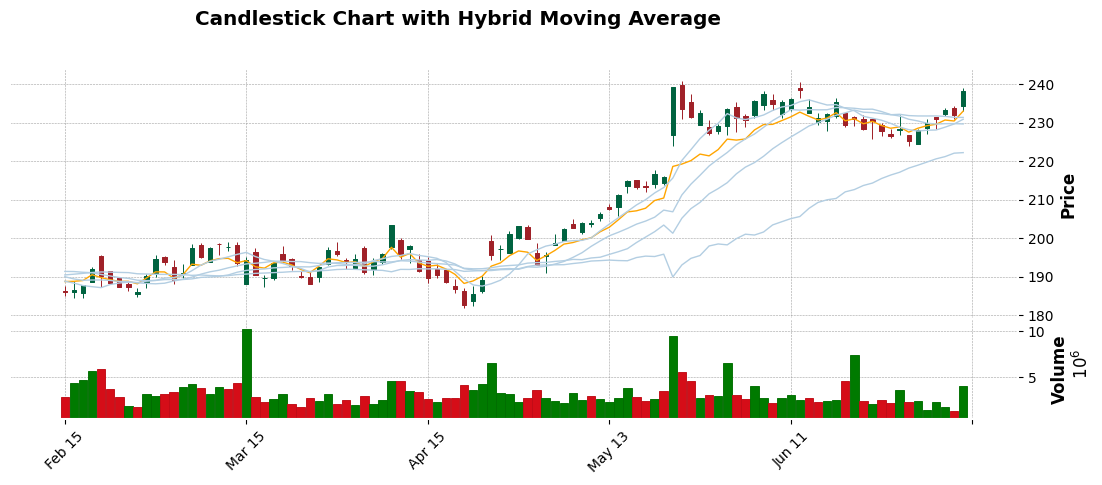

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 8
udemy.install_and_import('mplfinance')
import mplfinance as mpf

# Adjusting the figure size manually
figsize = (14, 5)  # Width and height of the figure in inches

# Number of days to plos
days2plot = 100

# Convert the 'datetime' column to datetime and set as index
df_subset = dfn.iloc[-days2plot:].copy()

df_subset['datetime'] = pd.to_datetime(df_subset['datetime'])
df_subset.set_index('datetime', inplace=True)

# Ensure the index is of type DatetimeIndex
assert isinstance(df_subset.index, pd.DatetimeIndex), "DataFrame index is not of type DatetimeIndex"

# Create candlestick chart using mplfinance
ap0 = [mpf.make_addplot(df_subset['SMAhybrid'], color='orange', width=1.0, panel=0, secondary_y=False),
       mpf.make_addplot(df_subset['SMA7'], color='#B3CEE2', width=1.0, panel=0, secondary_y=False),
       mpf.make_addplot(df_subset['SMA14'], color='#B3CEE2', width=1.0, panel=0, secondary_y=False),
       mpf.make_addplot(df_subset['SMA21'], color='#B3CEE2', width=1.0, panel=0, secondary_y=False),
       mpf.make_addplot(df_subset['SMA50'], color='#B3CEE2', width=1.0, panel=0, secondary_y=False)
       ]
mpf.plot(df_subset, type='candle', volume=True, addplot=ap0, style='charles', title='Candlestick Chart with Hybrid Moving Average', ylabel='Price', ylabel_lower='Volume', figsize=figsize)


In [ ]:
import numpy as np


# Create signals based on the crossover of the price with the moving averages
for sma in ['SMA7', 'SMA14', 'SMA21', 'SMA50', 'SMAhybrid']:
    df_subset[f'signal_{sma}'] = np.where(df_subset['close'] > df_subset[sma], 1, -1)

# Calculate the daily return in percentage
df_subset['daily_return'] = df_subset['close'].pct_change()

# Calculate the cumulative return for each SMA
performance = {}
for sma in ['SMA7', 'SMA14', 'SMA21', 'SMA50', 'SMAhybrid']:
    df_subset[f'strategy_return_{sma}'] = df_subset[f'signal_{sma}'].shift(1) * df_subset['daily_return']
    df_subset[f'cumulative_return_{sma}'] = (1 + df_subset[f'strategy_return_{sma}']).cumprod()
    performance[sma] = df_subset[f'cumulative_return_{sma}'].iloc[-1]

# Convert the results into a DataFrame for better visualization
performance_df = pd.DataFrame(list(performance.items()), columns=['SMA', 'Cumulative Return'])

# Display the DataFrame
print(performance_df)

performance_df

         SMA  Cumulative Return
0       SMA7           0.956996
1      SMA14           0.962090
2      SMA21           0.922542
3      SMA50           0.981353
4  SMAhybrid           0.951826


,SMA,Cumulative Return
0,SMA7,0.956996
1,SMA14,0.962090
2,SMA21,0.922542
3,SMA50,0.981353
4,SMAhybrid,0.951826


# **(OPTIONAL) DOWNLOAD TO LOCAL COMPUTER**

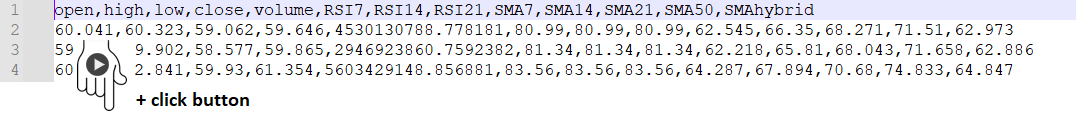
---

Press the button to get a csv formated file

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 9

display(udemy.create_download_link(df_subset, 'hybrid_indicator.csv', title="Press to Download CSV at your local computer"))